# Supervised Learning 

## Linear Regression

### Training with Random Dataset


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()



rng = np.random.RandomState(42)
x = 10 * rng.rand(50) # 0~10까지 50개 값 저장
y = 2* x -1 + rng.randn(50) # 랜덤 x 값을  Y = 2X + random 에 대입

### 1. Choose class of model (Linear Regression)

In [2]:
from sklearn.linear_model import LinearRegression

### 2. Choose model hyperparameters (offset, not normalized)
- Normalized : feature matrix 수치 -1~1
- Not Normalized : 변환 안됨

In [3]:
model = LinearRegression(fit_intercept=True)

### 3. Arrange data into feature matrix and target vector 

In [4]:
X = x[:,np.newaxis] # 1D -> 2D
# target matrix 1D hence no change required

### 4. Fit the model to your data  (y = ax+b)


In [5]:
model.fit(X,y)
model.coef_ , model.intercept_ # parameter a,b

(array([1.9776566]), -0.9033107255311164)

### 5. Predict labels for unknown data


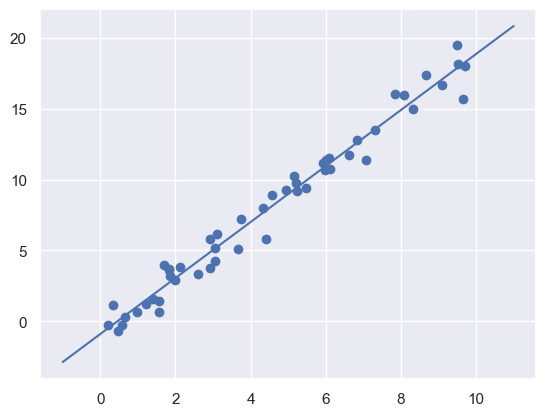

In [6]:
xfit = np.linspace(-1,11) # Random x values -1 ~ 11

Xfit = xfit[:,np.newaxis] # 1D -> 2D (Feature Matrix)
yfit = model.predict(Xfit)

plt.scatter(x,y) # scatterplot of data
plt.plot(xfit,yfit) # Linear Regression Model

# Classification
 - split dataset into training and testing set

### 1. Creating data

In [7]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()


# Feature Matrix (2D)
X_iris = iris.drop('species',axis=1)

# Target Vector (1D)
y_iris = iris['species']


X_iris.shape,y_iris.shape
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

### 2. Obtaining training & testing dataset

In [8]:
from sklearn.model_selection import train_test_split

# Obtain training & testing dataset
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris,y_iris,
                                                random_state=1)

### 3. Choose model class

In [9]:
from sklearn.naive_bayes import GaussianNB 

### 4. Instantiate model

In [10]:
model = GaussianNB()  

### 5. Fit model to data

In [11]:
model.fit(Xtrain, ytrain) 

GaussianNB()

### 4. predict on new data

In [12]:
y_model = model.predict(Xtest) 

### 5. Get accuracy score

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.9736842105263158

# Unsupervised Learning

## Dimensionality Reduction

### 1.  Choose model class

In [14]:
from sklearn.decomposition import PCA

### 2. Instantiate the model with hyperparameters

In [15]:
model = PCA(n_components=2) # 2D

### 3. Fit to data  (creating optimum parameters)

In [16]:
model.fit(X_iris) # Fit feature matrix

PCA(n_components=2)

### 4. Transform data (4D -> 2D)

In [17]:
X_2D = model.transform(X_iris)

### 5. Plotting data
- **PCAs** : X,Y axis
- **iris** : DataFrame
- **fit_reg** : Linear Regression == False

In [19]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]

sns.lmplot(x='PCA1', y='PCA2', hue='species', data=iris, fit_reg=False)

C:\Users\me\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
